# Book Recommendation System: LitWise!

In the vast world of books, one question echoes loudly: <b>"What should I read next?"</b> The immense library of human creation offers countless options, each book a new adventure waiting to be discovered. And that's where <b> LitWise </b> steps onto the stage—an indispensable digital companion with the remarkable ability to understand your reading preferences and unveil books that resonate with your heart.

Envision a world where book recommendations feel as if they were carefully selected by an insightful friend who knows your literary inclinations like the back of their hand. LitWise, a smart book recommendation system, brings this world to life. Through the marvels of data analysis and ingenious algorithms, it captures the essence of your reading habits, favorite genres, and the stories that you were intreseted in.

<h3> But how does this happen?</h3>  <br> Let us commence an exploration to comprehend recommendation systems.


Recommendation engines, a subset of machine learning, focus on allowing marketers to offer their customers relevant product recommendations in real-time. By using different algorithms and data analysis techniques, they recommend the most relevant products to a particular user. 

Major companies like Google, Instagram, Spotify, Amazon, Reddit, and Netflix employ recommendation systems to improve user interaction with their platforms.

<h3> How do recommendation engines work? </h3>

Typically, a recommendation engine processes data through the below four phases:

- Collection.
- Storing.
- Analyzing.
- Filtering. 

one of the crucial components behind the working of a product recommendation engine is the <b> recommender function </b>, which considers specific information about the user and predicts the rating that a user might assign to a product.
 

 
<h4> There are mainly three types of recommendation engines:</h4>

 
 - Collaborative Filtering: it's based on collecting and analyzing information and predicting what they will like based on        the similarity with other users.
 
 - Content-Based Filtering: They are based on the description of an item and a profile of the user's preferred choices.
 
 - Hybrid Recommendation Systems: they are essentially the combination of diverse rating and sorting algorithms.
 


<b>In this project </b>, we start by exploring our data to uncover its hidden insights. We then embark on an exciting journey to craft a strong book recommendation system. With precision and dedication, we'll create and evaluate various models to ensure our solution brings happiness to book enthusiasts and readers as much as possible.

<hr> 

<center> <h2> EDA </h2> <center>
    
 Let's start our EDA to explore the dataset.
    
 In this project we are using a book-recommendation dataset from Kaggle that Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004). It includes three tables as the following:
    
- Users 
    
 Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers.Demographic data is provided    (Location, Age) if available. Otherwise, these fields contain NULL-values.
    
    
- Books
    
  Books are identified by their respective ISBN. Moreover, some content-based information is given (Book-Title, Book-Author,     Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is     provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M,         Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.
    
    
- Ratings
    
 Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values   denoting higher appreciation), or implicit, expressed by 0.
    
    <b> Dataset link </b> : <a href= "https://drive.google.com/drive/folders/1xl2bpjT0hnhT3zieazrikMU4VCWoqPfI"> Book         Recommendation Dataset</a>

### Setting up the enivornment:

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pandas.api.types import is_numeric_dtype

### Data Loading

 #### Reading Book data

In [236]:
# Reading the data, specifying the semicolon (;) as the delimiter
books = pd.read_csv("../Dataset/BX-Books.csv", sep=";", error_bad_lines=False,encoding="latin-1" )

C:\Users\HP\AppData\Local\Temp\ipykernel_21400\694803224.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv("../Dataset/BX-Books.csv", sep=";", error_bad_lines=False,encoding="latin-1" )
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 

In [237]:
# Retrieving top 5 views
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [238]:
print("Number of rows : ", books.shape[0])
print("Number of features : ", books.shape[1])

Number of rows :  271360
Number of features :  8


In [239]:
# Retrieving the list of features in the book df
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

<b> Here, we are summarizing the list of features, their data types, and the number of non-Null values in each one </b>

- we notice that all features are of object type and the data is almost completed ( a very few values from some columns are null)

In [240]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [241]:
#checking for null_values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [242]:
# checking for duplicates
books.duplicated().sum()

0

<b> The data has no duplicated rows, which indicates rows  distinctness </b>

<p> Given that the data comprises three well-maintained and valid image-related features, we have chosen to 
incorporate the 'large image URLs' feature since it might have a better resolution<p> 

In [243]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


Here, we are adjusting the column names to adhere to standardized naming conventions.

In [244]:
# renaming features
books.rename(columns={
    "Book-Title": "title",
    "Book-Author": "author",
    "Year-Of-Publication": "year",
    "Publisher": "publisher",
    "Image-URL-L": "img_url"}, inplace=True)
books.head(2)

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [245]:
## Checking for column Year-of-publication
books['year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Noticing these unique values in the dataset, it's evident that some entries for the year are in string format. To address this issue, we need to handle these string values. One common approach is to fill them with the year that has the highest frequency (mode) in the dataset.

In [246]:
books.loc[books['year'] == 'Gallimard',:]

,ISBN,title,author,year,publisher,img_url
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,NaN


In [247]:
books.at[209538 ,'publisher'] = 'DK Publishing Inc'
books.at[209538 ,'year'] = 2000
books.at[209538 ,'title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'author'] = 'Michael Teitelbaum'

books.at[221678 ,'publisher'] = 'DK Publishing Inc'
books.at[221678 ,'year'] = 2000
books.at[209538 ,'title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'author'] = 'James Buckley'

books.at[220731 ,'publisher'] = 'Gallimard'
books.at[220731 ,'year'] = '2003'
books.at[209538 ,'title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

Here, we resolve data inconsistencies in the 'books' dataset by updating year, title, and author information for specific books, ensuring data consistency and accuracy.

In [248]:
## Converting year of publication in Numbers
books['year'] = books['year'].astype(int)

In [249]:
print(sorted(list(books['year'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [250]:
## Replacing Invalid years with max year
count = Counter(books['year'])
[k for k, v in count.items() if v == max(count.values())]

[2002]

In [251]:
books.loc[books['year'] > 2023, 'year'] = 2002
books.loc[books['year'] == 0, 'year'] = 2002

We are handling values representing incorrect years, including those exceeding the current year and those with zero values. These are replaced with the mode year since they represent a minority in the dataset.

In [252]:
books['year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2021, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 1376])

In [253]:
## Checking for null values
books.isnull().sum() 

ISBN         0
title        0
author       1
year         0
publisher    2
img_url      3
dtype: int64

In [254]:
# droping missing values for img_url
books = books[books['img_url'].notna()]

In [255]:
# retriveing books with missing values for publisher and author
books.loc[books['publisher'].isnull(),:]

,ISBN,title,author,year,publisher,img_url
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...


In [256]:
books.at[187689 ,'author'] = 'Other'

books.at[128890 ,'publisher'] = 'Other'
books.at[129037 ,'publisher'] = 'Other'

We are creating a new category named 'Other' for both 'publisher' and 'author' fields to handle missing values and categorize them under this label.

In [257]:
books.isnull().sum() 

ISBN         0
title        0
author       0
year         0
publisher    0
img_url      0
dtype: int64

#### Reading User data

In [258]:
# reading users data
users = pd.read_csv("../Dataset/BX-Users.csv", sep=";", error_bad_lines=False,encoding="latin-1" )

C:\Users\HP\AppData\Local\Temp\ipykernel_21400\1853820466.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv("../Dataset/BX-Users.csv", sep=";", error_bad_lines=False,encoding="latin-1" )


In [259]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [260]:
print ("Number of rows:  ", users.shape[0])
print("Number of columns : ", users.shape[1])

Number of rows:   278858
Number of columns :  3


Here, we are summarizing the users list of features with their datatypes and non-Null values counts

- noticing the summary, we find that the Age feature has lots of Null values

In [261]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [262]:
# retrieving the number of null ages
users['Age'].isnull().sum()

110762

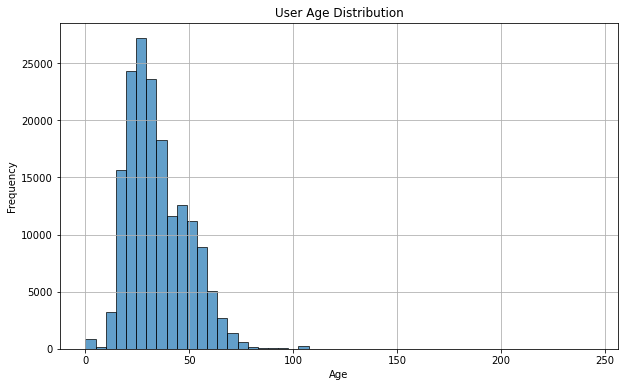

In [263]:
plt.figure(figsize=(10, 6))
plt.hist(users['Age'], bins=50, edgecolor='k', alpha=0.7)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Noticing the plot, we find:
- Some ages are zero while some of them are above 120, which indicates errornous data!

In [264]:
# Create a new DataFrame containing users with ages larger than 120
users_above_120 = users[users['Age'] > 120]
users_above_120.shape
# We have 78 users that have errornous age value(may we need to drop them ,because they are minority)

(78, 3)

In [265]:
users_ages_group = users.groupby(['Age']).size().reset_index(name='Count')
common_age = users_ages_group['Count'].max()
most_common_age = users_ages_group[users_ages_group['Count'] == common_age]
most_common_age

,Age,Count
24,24.0,5687


We find that most users are at the age of 24

In [266]:
least_common_age = users_ages_group[users_ages_group['Count'] == 1]
least_common_age

,Age,Count
95,95.0,1
107,107.0,1
109,109.0,1
110,110.0,1
111,111.0,1
116,118.0,1
117,119.0,1
120,127.0,1
121,128.0,1
122,132.0,1


Similarly, for the users dataset, we conducted a thorough examination, addressing data types, handling missing values, and eliminating duplicates. However, in this case, we have opted to remove the "Age" feature due to a substantial number of missing values and its limited relevance in our recommendation system.

In [267]:
users.drop('Age', axis=1, inplace=True)

In [268]:
list_ = users.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
users = users.drop('Location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

print('Number of countries: ',count_no_country)   #printing the number of countries didnt have any values 
print('Number of states: ',count_no_state)     #printing the states which didnt have any values

Number of countries:  4659
Number of states:  16044


we are performing data preprocessing and cleaning on location information within the 'users' dataset. We extract and structure city, state, and country details, handling cases of missing or invalid entries. Additionally, we calculate and display the counts of missing countries and states.

In [271]:
## Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

#### Reading Ratings data

In [272]:
# reading ratings data
ratings = pd.read_csv("../Dataset/BX-Book-Ratings.csv", sep=";", error_bad_lines=False,encoding="latin-1" )

C:\Users\HP\AppData\Local\Temp\ipykernel_21400\1265045936.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv("../Dataset/BX-Book-Ratings.csv", sep=";", error_bad_lines=False,encoding="latin-1" )


In [273]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [274]:
print("Number of reviews: " , ratings.shape[0])
print("Number of features: ", ratings.shape[1])

Number of reviews:  1149780
Number of features:  3


In [275]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Noticing the above results of features info summary, no missing values are existed.

In [276]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [277]:
print("Books shape is: ", books.shape)
print("Users shape is: ", users.shape)
print("Ratings shape is:",ratings.shape)

Books shape is:  (271357, 6)
Users shape is:  (278858, 4)
Ratings shape is: (1149780, 3)


The varying shapes of the three datasets indicate differences in the number of unique books, users, and recorded ratings.  These differences in data volume may lead to varying coverage for different books and users, potentially affecting recommendation system performance and analysis outcomes.

#### Renaming ratings columns 

In [278]:
ratings.rename(columns= {
    "User-ID": "user_id" ,
    "Book-Rating": "rating" 
}, inplace=True)
ratings.head(5)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [279]:
## checking all ratings number or not
print(is_numeric_dtype(ratings['rating']))

True


Given the distinct shapes of the three datasets, our initial exploration involves identifying the unique number of users who have provided ratings for one or more books in the dataset.

In [280]:
# number of unique users/reviewers
print('The number of unique users is :',ratings['user_id'].unique().shape)
print('The number of reviews is :',ratings.shape)

The number of unique users is : (105283,)
The number of reviews is : (1149780, 3)


So according to the results about 105283 users have given one or more ratings 

<b> Here, we are finding the number of ratings given by each user </b>

In [281]:
ratings['user_id'].value_counts().reset_index(name="Reviews_per_user")

,index,Reviews_per_user
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850
...,...,...
105278,116180,1
105279,116166,1
105280,116154,1
105281,116137,1


In [282]:
ratings_per_user=ratings['user_id'].value_counts()
ratings_per_user.describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: user_id, dtype: float64

The dataset appears to have a highly skewed distribution, with a vast majority of values clustered around 1, that may incidates that the majority of users are new ones or not active users. But a few extreme  values as high as 13,602, suggesting potential data anomalies or unique cases that warrant further examination.

So, here we are trying to investigate more in this.

In [283]:
users_of_more_50_reviews = ratings['user_id'].value_counts() > 50
users_of_more_50_reviews.value_counts()

False    101912
True       3371
Name: user_id, dtype: int64

In [284]:
users_of_more_200_reviews = ratings['user_id'].value_counts() > 200
users_of_more_200_reviews.value_counts()

False    104384
True        899
Name: user_id, dtype: int64

In [285]:
users_of_more_500_reviews = ratings['user_id'].value_counts() > 500
users_of_more_500_reviews.value_counts()

False    104996
True        287
Name: user_id, dtype: int64

In [286]:
users_of_less_200_reviews = ratings['user_id'].value_counts() <200
users_of_less_200_reviews.value_counts()

True     104378
False       905
Name: user_id, dtype: int64

In [287]:
ratings.shape

(1149780, 3)

Here, we are joining books and ratings tables based on ISBN feature.

In [288]:
ratings_with_books = ratings.merge(books, on = "ISBN")
ratings_with_books.head(3)

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...


In [289]:
ratings_with_books.shape

(1031132, 8)

We are categorizing the given ratings by the book title, then finding the number of ratings are given for each book.
This can leads to have more insights about the popularity and engagement level of different books, facilitating tasks like identifying bestsellers and user preferences analysis.

In [290]:
# categorizing ratings by title and counting the number of ratings for each book
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [291]:
num_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [292]:
num_rating[['rating']].describe()

,rating
count,241068.000000
mean,4.277349
std,16.738785
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,2502.000000


The statistical summary of number of ratings per book reveals that the majority of books have relatively few ratings, with a median value of 1 rating per book. However, there are ones with a maximum of 2,502 ratings, indicating the presence of highly popular books that have garnered significant attention and engagement from users. 


In [293]:
num_rating['rating'].unique()

array([   4,    1,    2,   10,    9,   11,   17,    3,    5,   47,    8,
          6,   12,   22,    7,   61,   13,   23,   37,   28,   65,   14,
         20,  284,  509,   24,   25,   90,   21,   71,   57,  106,   30,
        356,   85,  151,   16,   50,   31,  125,   41,   74,   44,   46,
         32,   18,  136,   15,  346,   35,   29,   26,   38,  236,   27,
        265,  156,   33,   52,   83,   67,   81,  139,   92,   54,  108,
         39,  140,  116,   40,   42,   34,   48,  169,  104,   99,  302,
        285,   86,  192,  109,   59,   75,  128,  174,  327,   19,   49,
         36,   51,   66,  838,   68,  149,   64,   82,   63,   76,  413,
         60,   56,  118,   78,   45,   95,   62,   43,   97,  135,  210,
        549,   96,  101,  164,  205,  378,  273,   53,  158,  150,   70,
         69,  279,  262,  121,  126,   77,  141,  332,  112,   84,  187,
         58,  258,   55,  184,  147,  304,  110,   93,  114,   91,   72,
         94,   80,  326,  222,  170,  670,  167,  2

In [294]:
num_rating['rating'].value_counts()

1      127511
2       42728
3       20255
4       11364
5        7529
        ...  
588         1
575         1
428         1
347         1
234         1
Name: rating, Length: 377, dtype: int64

In [295]:
num_rating.rename(columns = {
    'rating':'num_of_ratings'
}, inplace=True)

Here, We Combine the 'ratings_with_books' Data with the 'num_rating' Data based on the 'title' column to associate each book's rating count with its respective rating data.

In [296]:
final_rating = ratings_with_books.merge(num_rating, on = "title")

In [297]:
final_rating.head(5)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60


In [298]:
final_rating.shape

(1031132, 9)

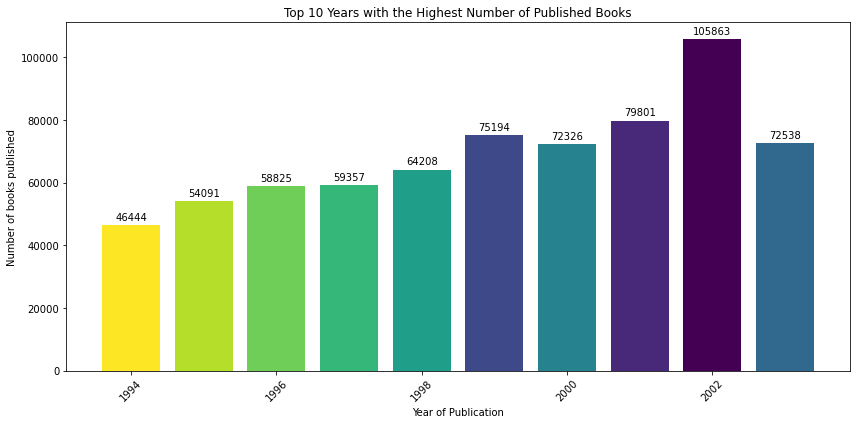

In [299]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of books published per year
publications = final_rating['year'].value_counts().to_dict()

# Get the top 10 years with the highest numbers of published books
top_years = dict(sorted(publications.items(), key=lambda item: item[1], reverse=True)[:10])

# Create a colormap for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top_years)))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = plt.bar(top_years.keys(), top_years.values(), color=colors)
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Top 10 Years with the Highest Number of Published Books")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels with the number of books above the bars for the top 10 years
for year, num_books in top_years.items():
    ax.annotate(f'{num_books}', xy=(year, num_books), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()


This bar chart offers valuable insights into book publication trends over the years. Notably, 2002 had the highest publication rate, recording 105,863 books, while 1994 saw the lowest at 46,444. These variations highlight historical publishing trends and possible influencing factors.


Text(0.5, 1.0, 'No of books by an author (Top 15)')

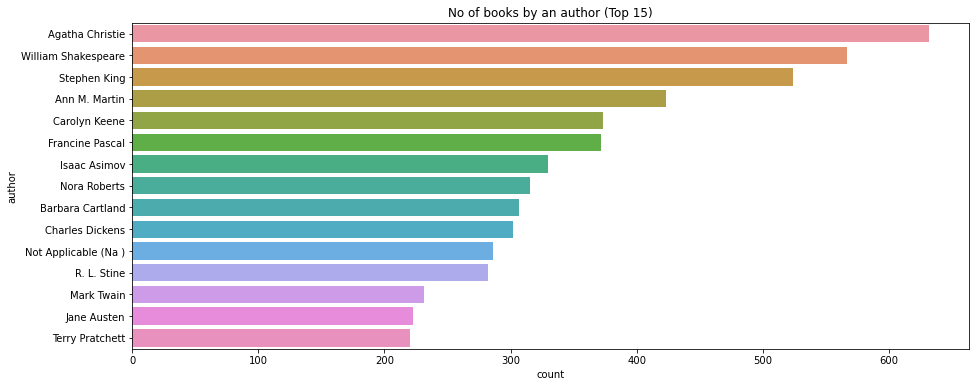

In [300]:
plt.figure(figsize=(15,6))
sns.countplot(y="author", data=books,order=books['author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

This plot reveals significant variations in the number of books authored by different writers. Agatha Christie emerges as the most prolific author, suggesting her widespread popularity, which could impact the ratings of her books. Conversely, Jane Austen and Terry, among the top 15 authors, have authored a comparatively lower number of books.

<AxesSubplot:xlabel='rating', ylabel='count'>

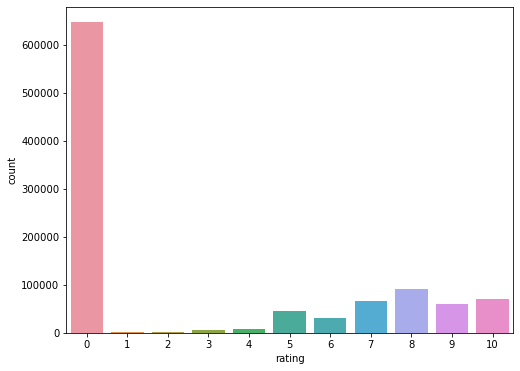

In [301]:
plt.figure(figsize=(8,6))
sns.countplot(x="rating", data=final_rating)

This dataset illustrates the distribution of book ratings from 0 to 10, with the most common rating being 0 (44,908 occurrences), indicating numerous unrated or poorly rated books. Higher ratings of 8, 10, and 9 are also prevalent, suggesting a significant number of well-received books. Conversely, lower ratings of 1, 2, and 3 are less common, indicating a smaller proportion of books with poor ratings.

In [302]:
final_rating['rating'].value_counts()

0     647291
8      91804
10     71225
7      66401
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: rating, dtype: int64

<b> Here, we are categorizing the books by their author name</b>

In [303]:
author_ratings = final_rating.groupby('author')['num_of_ratings'].sum().reset_index()
author_ratings

,author,num_of_ratings
0,D. Chiel,16
1,J. D. Landis,2
2,Mimma Balia,1
3,'N Sync,1
4,142 moms from all over the world,1
...,...,...
101582,Â¢ystein LÂ²nn,1
101583,Ã?dÃ¶n von HorvÃ¡th,6
101584,Ã?Â?dÃ?Â¶n von Horvath,4
101585,Ã?Â?pictÃ?Â¨te,4


In [304]:
author_rating = final_rating.groupby('author')['num_of_ratings'].sum().reset_index()

# Sorting the DataFrame in descending order based on the total ratings
author_ratings_sorted = author_ratings.sort_values(by='num_of_ratings', ascending=False)

# Get the top 10 authors with the highest total ratings
top_10_authors = author_ratings_sorted.head(10)

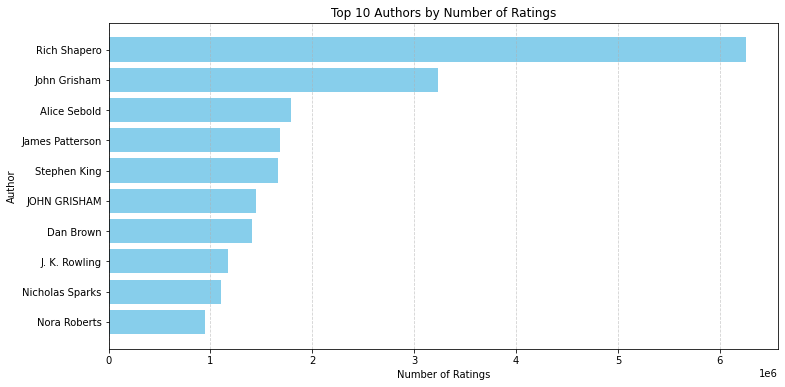

In [305]:
plt.figure(figsize=(12, 6))
plt.barh(top_10_authors['author'], top_10_authors['num_of_ratings'], color='skyblue')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest at the top
plt.title('Top 10 Authors by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Author')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

The plot elegantly displays the top ten celebrated authors alongside the corresponding number of ratings they have received.
<b> Rich Shapero </b> is the most celebrated one.

Text(0.5, 1.0, 'No of readers from each city (Top 15)')

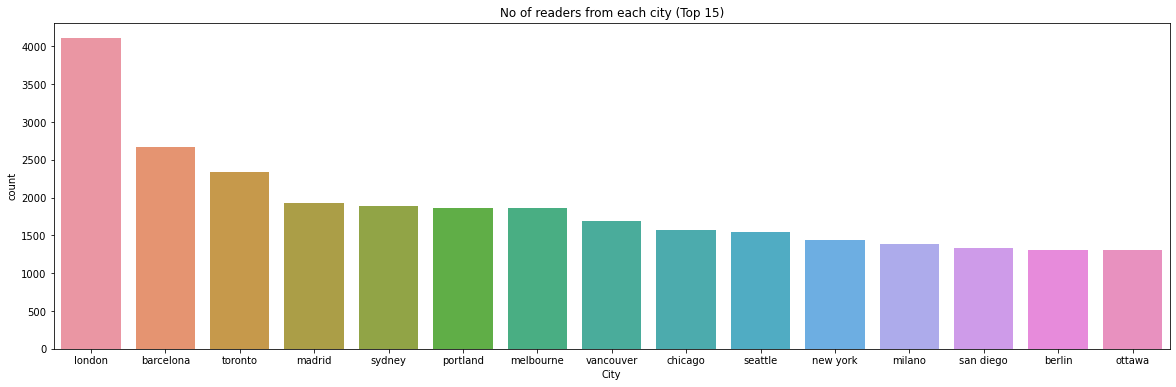

In [306]:
plt.figure(figsize=(20,6))
sns.countplot(x="City", data=users,order=users['City'].value_counts().index[0:15])
plt.title("No of readers from each city (Top 15)")

This chart provides insights into the distribution of readers across different cities. London stands out with the highest number of readers, indicating a strong reading community in the city. Conversely, cities like Seattle, New York, and San Diego show comparatively lower reader numbers, suggesting varying levels of reading engagement in these locations.

In [307]:
final_rating.sample(10)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
578530,270713,0140167927,8,Tempest Tost (Salterton Trilogy),Robertson Davies,1980,Penguin Books,http://images.amazon.com/images/P/0140167927.0...,3
109300,25981,0345441036,10,Black House,Stephen King,2002,Ballantine Books,http://images.amazon.com/images/P/0345441036.0...,207
760733,44802,0312962126,0,Extinct,Charles Wilson,1997,St. Martin's Press,http://images.amazon.com/images/P/0312962126.0...,9
964998,174216,0671458914,0,FDR CENTENRY REMBR,Kelli M. Gary,1982,Pocket,http://images.amazon.com/images/P/0671458914.0...,1
87300,125039,0425161242,0,Chromosome 6,Robin Cook,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425161242.0...,128
901046,110973,0373112033,0,"Take Away The Pride (Harlequin Presents, 1203)",Emma Richmond,1989,Harlequin,http://images.amazon.com/images/P/0373112033.0...,1
838795,135149,082177140X,6,I Dream of You,Judi McCoy,2001,Zebra Books,http://images.amazon.com/images/P/082177140X.0...,10
121996,133961,0747527873,0,Alias Grace,Margaret Atwood,1996,Raincoast Book Dist Ltd,http://images.amazon.com/images/P/0747527873.0...,112
900570,110973,0373104782,0,Girl from Nowhere (Harlequin Presents),Charlotte Lamb,1982,Harlequin Books,http://images.amazon.com/images/P/0373104782.0...,2
285436,76942,0440201926,0,Kaleidoscope,Danielle Steel,1988,Dell,http://images.amazon.com/images/P/0440201926.0...,115


In [308]:
final_rating.shape

(1031132, 9)

<b> Here we handle a common data scenario where users may submit multiple reviews for the same book at different times. We are doing this to ensure the data consistency. </b>

In [309]:
final_rating.drop_duplicates(['title','user_id'], inplace = True)

In [310]:
final_rating.shape

(1026354, 9)

In [311]:
final_rating.sample(7)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
148797,232422,0060198346,0,The Sky Is Falling,Sidney Sheldon,2000,William Morrow &amp; Company,http://images.amazon.com/images/P/0060198346.0...,112
843111,77940,1551664798,0,Duncan'S Bride,Linda Howard,1998,Mira,http://images.amazon.com/images/P/1551664798.0...,8
1012220,238781,0590331051,0,The Mystery Cruise (Windswept),Carole Standish,1984,Scholastic,http://images.amazon.com/images/P/0590331051.0...,2
103093,218552,0440213525,8,The Client,John Grisham,1994,Dell Publishing Company,http://images.amazon.com/images/P/0440213525.0...,483
807489,73651,0553375369,0,The Death of Bernadette Lefthand: A Novel,Ronald B. Querry,1995,Bantam,http://images.amazon.com/images/P/0553375369.0...,4
610911,242006,084394952X,10,Dark Legend,Christine Feehan,2002,Leisure Books,http://images.amazon.com/images/P/084394952X.0...,24
574306,224349,0062502891,0,"The Chalice and the Blade: Our History, Our Fu...",Riane Eisler,1988,HarperSanFrancisco,http://images.amazon.com/images/P/0062502891.0...,15


In this exploratory data analysis (EDA), we've meticulously examined the book recommendation dataset. We began by addressing missing values to ensure data integrity. Next, we explored feature values, gaining insights into books, user interactions, and ratings. Notably, we strategically combined three tables—book information, user details, and user ratings—into a final rating dataset, primed for training recommendation models.

This EDA has laid a solid foundation for our next steps: the development of efficient recommendation algorithms. Our next step is to start with modeling and training process.


<hr>
Before we start building our models, we need to clean and filter our data. This is because, during our initial data exploration, we discovered some issues that need to be addressed. Filtering the data will help us remove any irrelevant or problematic information, ensuring that our models can work effectively. This step is essential to ensure that our modeling phase is based on high-quality data, leading to more accurate and valuable results.

In [312]:
ratings_per_user=ratings['user_id'].value_counts()
ratings_per_user.describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: user_id, dtype: float64

The dataset displays a skewed distribution, predominantly around a value of 1, suggesting that most users may be newcomers or infrequent users. However, there are significant outliers, with values as high as 13,602, indicating potential anomalies or unique cases requiring attention.

To enhance data quality, we are contemplating defining a reasonable range for the number of reviews per user and considering only users with a minimum of 200 reviews. This approach ensures that our analysis centers on engaged and active users, contributing to dataset refinement.

In [313]:
x = ratings['user_id'].value_counts() > 200

In [314]:
x[x].shape

(899,)

In [315]:
y = x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [316]:
ratings[ratings['user_id'].isin(y)]

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


In [317]:
ratings=ratings[ratings['user_id'].isin(y)]
ratings.shape

(526356, 3)

In [318]:
# here we are going to join books and ratings tables based on ISBN feature
ratings_with_books = ratings.merge(books, on = "ISBN")
# here ratings_with_books will include only books reviewed by top reviewers
ratings_with_books.head(3)

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [319]:
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [320]:
num_rating[['rating']].describe()

,rating
count,160266.000000
mean,3.042866
std,7.421961
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,363.000000


The statistical summary of 'num_of_rating' column shows that books receive an average of around 3.04 ratings, with substantial variability. Ratings range from 1 to 363 per book, indicating diverse user engagement levels. To improve recommendation accuracy, we may consider including books exceeding a predefined rating threshold in our analysis.

In [321]:
num_rating.rename(columns = {
    'rating':'num_of_ratings'
}, inplace=True)

Here, We Combine the 'ratings_with_books' Data with the 'num_rating' Data based on the 'title' column to associate each book's rating count with its respective rating data.

In [322]:
final_rating = ratings_with_books.merge(num_rating, on = "title")

In [323]:
final_rating.head(2)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [324]:
final_rating =final_rating[final_rating['num_of_ratings'] >= 50 ]
final_rating.head(2)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


<br>
<br>
Here, we filter the "final_rating" dataset, including only books with more than 50 ratings, ensuring that we concentrate on well-reviewed books.

In [325]:
final_rating.drop_duplicates(['title','user_id'], inplace = True)

<b> Here we handle a common data scenario where users may submit multiple reviews for the same book at different times. We are doing this to ensure the data consistency. </b>

<hr>

## Book Recommendation System using Collaborative Filtering

**Recommendation System Types:**

Personalized recommendation systems come in two primary types:

1. Content-Based Filtering:** This approach personalizes recommendations by considering a user's past preferences and item attributes, such as author, publisher, or genre. It suggests items that share similarities with those the user has previously enjoyed.

2. Collaborative-Based Filtering:** Recommendations in this category are solely based on a user's historical likes and dislikes, as well as the rating patterns of other users. It doesn't take into account item characteristics like author or genre, nor user attributes like age, gender, or location. Collaborative filtering can be divided into two subtypes:

   a- Memory-Based Approach:** This method employs the entire user-item rating dataset to calculate similarity scores between items or users, forming the basis for recommendations. It further branches into:
    
   1. User-Based:** Items are recommended to a user based on the preferences of users who share similar tastes. If one user closely resembles another and the latter enjoyed a particular item, it is suggested to the former.
        
   2. **Item-Based:** Recommendations rely on the similarity of items that a user has previously rated positively.
    
   b- Model-Based Approach:** Utilizing user-item rating data, this approach constructs a recommendation model. Rather than utilizing the entire dataset, the model is leveraged to generate recommendations. This approach is favored when considerations like scalability and efficiency are paramount.



<br>
<br>

### Project Objective:

This project revolves around the development of a collaborative filtering recommendation system, specifically focusing on the memory-based approach, which encompasses both user-based and item-based systems.

#### We will start preparing our dataset for modeling. The first step is transforming the data into a pivoted table.

This transformation is essential as it prepares the data for modeling using <b> K-Nearest Neighbors (KNN) </b> algorithm, which relies on calculating similarities between users or items in this structured format to make accurate book recommendations. 

<b>A pivoted table </b> reorganizes our data so that each row represents a unique user, each column represents a book (identified by ISBN), and the values within the table indicate the user's rating for a particular book.
 <br>

In [326]:
# constructing pivot table for user_based CF
book_pivot= final_rating.pivot_table(index="user_id" , columns="ISBN", values="rating")

In [327]:
book_pivot

ISBN,0001047973,0006177379,0020697406,002542730X,002542730x,0060008024,0060008032,006001203X,0060086246,0060090367,...,9505112076,B00001IVC7,B00001U0CP,B00007CWQC,B00008WFXL,B00009EF82,B00009NDAN,B0000T6KHI,B0001PIOX4,B000234N76
user_id,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277427,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The provided pivot table displays user ratings for various books, where rows represent unique user IDs, columns represent ISBNs of books, and values within the table represent user ratings. However, it's evident that this table contains numerous null (NaN) values, indicating that many users have not rated certain books.

To address this issue, we will use the fillna method to replace these null values with zeros (0). By doing so, we create a more complete and structured dataset that aligns with the requirements of our recommendation system, allowing us to proceed with data modeling while considering the absence of user ratings for specific books.

In [328]:
book_pivot.fillna(0,inplace=True)
book_pivot

ISBN,0001047973,0006177379,0020697406,002542730X,002542730x,0060008024,0060008032,006001203X,0060086246,0060090367,...,9505112076,B00001IVC7,B00001U0CP,B00007CWQC,B00008WFXL,B00009EF82,B00009NDAN,B0000T6KHI,B0001PIOX4,B000234N76
user_id,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
from scipy.sparse import csr_matrix

In [330]:
book_sparse= csr_matrix(book_pivot)
book_sparse

<888x2144 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

we are transforming our pivot table into a sparse matrix using Compressed Sparse Row (CSR) format. This conversion is essential due to the extensive zero values in the user-book rating matrix. Sparse matrices optimize memory usage and computational efficiency during modeling processes.

## Using KNN algorihtm for modeling 

In our User-Based Collaborative Filtering, we rely on the K-Nearest Neighbors (KNN) algorithm. KNN helps find similar users based on their past activity, allowing us to suggest books that align with their preferences. It measures user "closeness" effectively, enhancing personalized book recommendations within our collaborative filtering system.

In [331]:
# importing NearestNeighbors
from sklearn.neighbors import NearestNeighbors

In [332]:
# creating an object of NearestNeighbors
model = NearestNeighbors(metric= "cosine",algorithm="brute", n_neighbors= 6)

In [333]:
#training the model
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [334]:
# trying to check the distances and user_suggestions for mock_user_id = 237
distance , suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6)

we are using a recommendation model to find the six nearest neighbors to a specific book based on its attributes. The "distance" array represents the similarity scores between the user and his neighbors, while the "suggestion" array contains the indices of these neighbor users.

In [335]:
distance

array([[0.        , 0.69534841, 0.70283918, 0.71095291, 0.78984349,
        0.80228135]])

In [336]:
suggestion

array([[237, 634, 887,  21,  66, 186]], dtype=int64)

In [337]:
# retriveing nearest similar users for user_id = 237
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Int64Index([85701, 204591, 278418, 8936, 26516, 69042], dtype='int64', name='user_id')


In [338]:
users_names = book_pivot.index

In [339]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(users_names,open('artifacts/users.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))

Here we are saving the recommendation model and related data to files for reusing it.

In [340]:
def recommend_users(usr_in_id):
    user_id_ = np.where(book_pivot.index == usr_in_id)[0][0]
    distance , suggestion = model.kneighbors(book_pivot.iloc[user_id_,:].values.reshape(1,-1), n_neighbors=5)
    
    for i in range(len(suggestion)):
        users = book_pivot.index[suggestion[i]]
        for j in users:
            print(j)

This recommend_users function takes an input user ID and recommends users who have similar reading preferences based on the collaborative filtering model. It prints the recommended user IDs as output.

In [341]:
# mock_user_id
usr_id= 277639

recommend_users(usr_id )

277639
187170
104429
252222
148199


In [342]:
def recommend_books(user_id, n_neighbors=5, n_recommendations=10):
    # Finding the user's row index in the 'book_pivot' DataFrame
    user_ratings = book_pivot.loc[user_id, :]

    # Finding the nearest neighbors of the user
    distances, neighbor_indices = model.kneighbors([user_ratings], n_neighbors=n_neighbors)

    # Getting the user IDs of the nearest neighbors
    neighbor_user_ids = book_pivot.index[neighbor_indices[0]]

    # Creating a dictionary to store book recommendations
    book_recommendations = {}


    for neighbor_user_id in neighbor_user_ids:
        # Find books rated by the neighbor but not by the user
        neighbor_ratings = book_pivot.loc[neighbor_user_id, :]
        recommended_books = neighbor_ratings[user_ratings == 0]  # Select unrated books

        # Store the recommendations in the dictionary
        book_recommendations[neighbor_user_id] = recommended_books

    # Combine all recommendations and recommend the top 'n_recommendations' books
    all_recommendations = pd.concat(book_recommendations.values()).groupby(level=0).sum()
    top_recommendations = all_recommendations.sort_values(ascending=False).head(n_recommendations)

    return top_recommendations

# Example usage
user_id = 254
recommended_books = recommend_books(user_id)
print("Recommended Books for User", user_id)
print(recommended_books)


Recommended Books for User 254
ISBN
059035342X    10.0
0375823352    10.0
0373825013    10.0
0439064864     9.0
0380002930     7.0
0804105820     7.0
014034294X     7.0
0671727583     7.0
1896095011     5.0
0425097722     5.0
dtype: float64


This recommend_books function recommends books to a user based on their reading preferences and the preferences of similar users. It returns a pandas Series containing the top recommended books for the user, considering the specified number of neighbors and recommendations

In [343]:
def get_book_titles(isbn_list):
    """
    Retrieve unique book titles from the 'final_rating' DataFrame based on a list of ISBNs.
    
    Parameters:
    - isbn_list (list): List of ISBNs to retrieve book titles for.
    
    Returns:
    - titles (list): List of unique book titles corresponding to the given ISBNs.
    """
    # Using 'final_rating' DataFrame to map ISBNs to book titles
    titles = final_rating[final_rating['ISBN'].isin(isbn_list)]['title'].unique().tolist()

    return titles

user_id = 183
recommended_isbns = recommended_books.keys()
recommended_titles = get_book_titles(recommended_isbns)
print("Recommended Books for User", user_id)
c=0
for title in recommended_titles:
    c+=1
    print('Recommend book top #'+str(c)+" : "+title)


Recommended Books for User 183
Recommend book top #1 : Harry Potter and the Chamber of Secrets (Book 2)
Recommend book top #2 : Whirlwind (Tyler, Book 1)
Recommend book top #3 : Matilda
Recommend book top #4 : Watership Down
Recommend book top #5 : Dreamcatcher
Recommend book top #6 : The Amber Spyglass (His Dark Materials, Book 3)
Recommend book top #7 : Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Recommend book top #8 : Fatherhood
Recommend book top #9 : It Was on Fire When I Lay Down on It
Recommend book top #10 : Smart Women


### Item based Book Recommendation Using KNN

Here we follow the same tseps, we construct a pivoted table and handle missing values by replacing them with zeros. Subsequently, we create a pivotal book parsing object and utilize it to train and fit our model.

In [344]:
book_pivot_item_based= final_rating.pivot_table(index="title" , columns="user_id", values="rating")
book_pivot_item_based.fillna(0,inplace=True)
book_pivot_item_based

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [345]:
book_sparse_item_based= csr_matrix(book_pivot_item_based)
book_sparse_item_based

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

In [346]:
model_item_based=NearestNeighbors(metric="cosine" ,algorithm="brute",n_neighbors=6)

In [347]:
model_item_based.fit(book_sparse_item_based)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [348]:
distance_items , suggestion_items = model_item_based.kneighbors(book_pivot_item_based.iloc[237,:].values.reshape(1,-1), n_neighbors=6)

In [349]:
 suggestion_items

array([[237, 240, 238, 242, 241, 239]], dtype=int64)

In [350]:
books_index = book_pivot_item_based.index

In [351]:
#saving the model 
import pickle
pickle.dump(model_item_based,open('artifacts/model_item_based.pkl','wb'))
pickle.dump(books_index,open('artifacts/books_isbn.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot_item_based,open('artifacts/book_pivot_item_based.pkl','wb'))

In [352]:
def recommend_book(book_name):
    book_id= np.where(book_pivot_item_based.index == book_name)[0][0]
    distance , suggestion = model_item_based.kneighbors(book_pivot_item_based.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)
    
    for i in range(len(suggestion)):
        books = book_pivot_item_based.index[suggestion[i]]
        for j in books:
            print(j)

This recommends books function finds and prints the names of recommended books based on their similarity to the input book.

In [353]:
# mock book_title
book_name = 'Nights in Rodanthe'

recommend_book(book_name)

Nights in Rodanthe
The Mulberry Tree
Sea Glass: A Novel
The Wedding
Sanctuary
Dark Angel


In conclusion, this book recommendation system project has successfully implemented collaborative filtering techniques, specifically user-based and item-based approaches, utilizing the K-Nearest Neighbors (KNN) algorithm. These methods have proven effective in providing personalized book recommendations based on user preferences and book similarities. However, it's important to acknowledge the challenge of the cold-start problem when dealing with new users who have a limited number of ratings or none at all. In such cases, the system may struggle to provide accurate recommendations.

To enhance the system's performance and address the cold-start problem, a hybrid approach can be considered. This hybrid recommendation system would leverage both user similarities and item similarities, combining the strengths of collaborative and content-based filtering techniques. By incorporating additional features, such as book attributes (e.g., author, publisher), the system can offer more robust and reliable recommendations, even for users with sparse or no rating histories.

For next steps, We aim to boost LitWise's accuracy through a hybrid approach, merging collaborative and content-based filtering to enhance book recommendations.